<a href="https://colab.research.google.com/github/it5joys135/ML-Projects/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
data = files.upload()

Saving bank-full.csv to bank-full.csv


In [ ]:
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


(0.0, 1000.0)

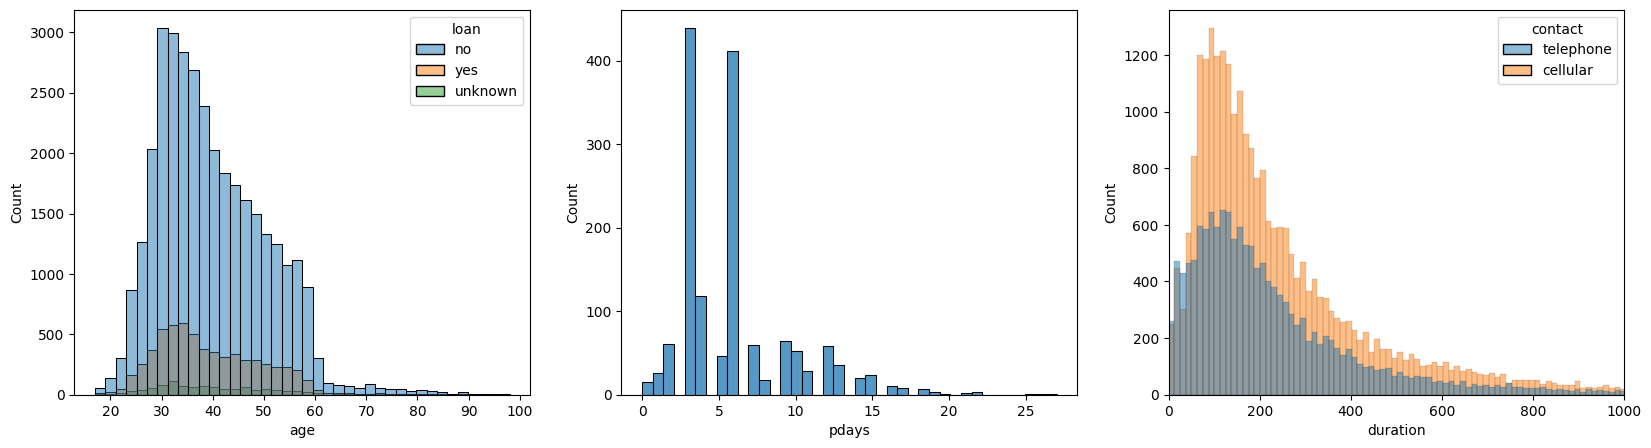

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.histplot(x='age', data=df, bins=40, hue='loan', ax=axes[0])
sns.histplot(x='pdays', data=df[df['pdays']!=999], ax=axes[1])
sns.histplot(x='duration', hue='contact', data=df, ax=axes[2])
plt.xlim(0, 1000)

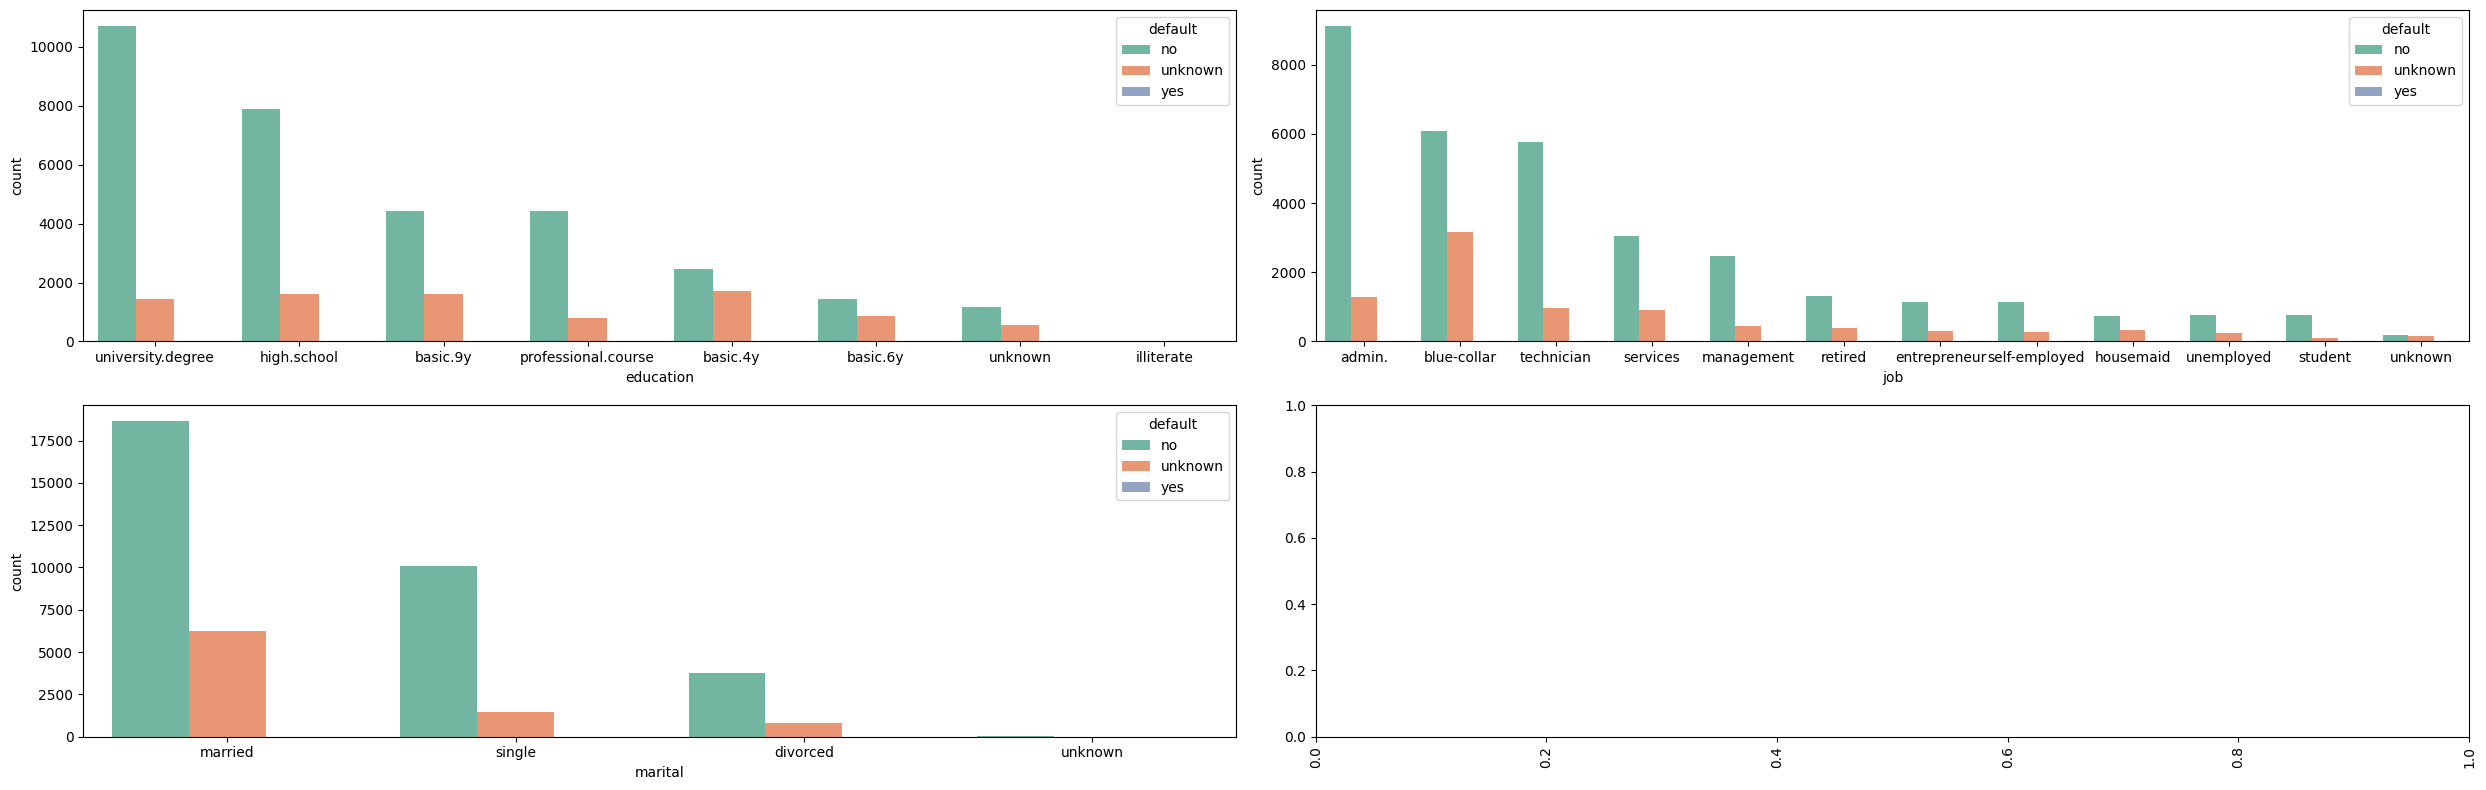

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,8))
sns.countplot(x='education', data=df, ax=axes[0,0], order=df['education'].value_counts().index, palette='Set2', hue='default')
sns.countplot(x='marital', data=df, ax=axes[1,0], order=df['marital'].value_counts().index, palette='Set2', hue='default')
sns.countplot(x='job', data=df, ax=axes[0,1], order=df['job'].value_counts().index, palette='Set2', hue='default')
plt.tight_layout()
plt.xticks(rotation=90);

In [ ]:
X = pd.get_dummies(df)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=2)

In [ ]:
cluster_labels = model.fit_predict(X_scaled)
cluster_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
X['cluster'] = cluster_labels

<Axes: >

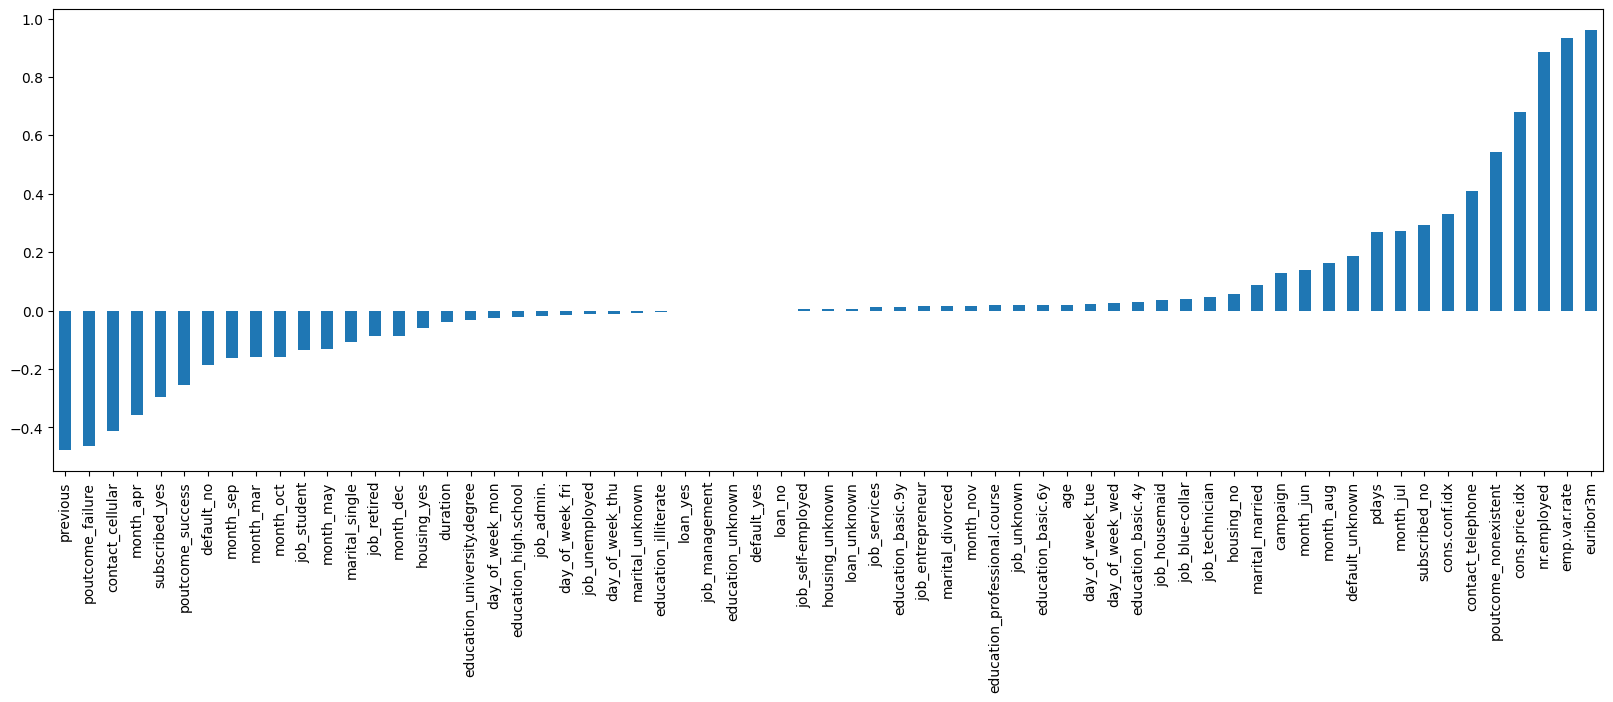

In [ ]:
plt.figure(figsize=(20,6))
X.corr()['cluster'][:-1].sort_values().plot(kind='bar')

In [ ]:
ssd = []

for k in range(2, 10):
  model = KMeans(n_clusters=k)
  model.fit(X_scaled)

  ssd.append(model.inertia_)  # SSD Points to cluster

In [ ]:
ssd

[2469792.361662776,
 2371352.6696267202,
 2327653.550279177,
 2253993.863498419,
 2228228.9475884256,
 2155112.619185965,
 2070257.569449239,
 2037839.628810049]

Text(0, 0.5, 'SSD')

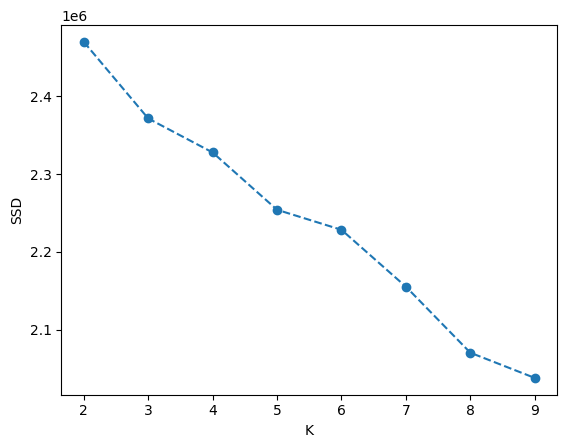

In [ ]:
plt.plot(range(2, 10), ssd, 'o--')
plt.xlabel('K')
plt.ylabel('SSD')

In [ ]:
pd.Series(ssd)

,0
0,2.469792e+06
1,2.371353e+06
2,2.327654e+06
3,2.253994e+06
4,2.228229e+06
5,2.155113e+06
6,2.070258e+06
7,2.037840e+06


In [ ]:
pd.Series(ssd).diff()

,0
0,NaN
1,-98439.692036
2,-43699.119348
3,-73659.686781
4,-25764.915910
5,-73116.328402
6,-84855.049737
7,-32417.940639
